In [1]:
import os
import matplotlib
matplotlib.use('Agg')
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from utils.utils import load_group_results
from utils import plot
from tqdm import tqdm
%matplotlib inline

# set up matplotlib

plt.ion()

/opt/pyenv/versions/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [162]:
result_1 = load_group_results('logs/', verbose=True, mask="^logs/mlap-sac/")
result_2 = load_group_results('logs/', verbose=True, mask="^logs/sac_scratch/LunarLanderContinuous-v2.*")

successfully loaded logs/mlap-sac/LunarLanderContinuous-v2_SDW-13-30_1
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-25_1
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-25_2
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-25_3
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-30_1
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-30_2
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-30_3
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-35_1
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-35_2
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-35_3
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-40_1
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-40_2
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-40_3
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-45_1
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-45_2
empty dir  logs/mlap-sac/LunarLanderContinuous-v2_SDW-10-45_3

In [163]:
result_3 = load_group_results('logs/', verbose=True, mask="^logs/sac/.*mlap-stateDep.*")
result_4 = load_group_results('logs/', verbose=True, mask="^logs/mlap-ppo2/.*")

successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep18-35_3
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep18-40_1
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-25_1
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-25_2
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-25_3
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-30_1
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-30_2
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-30_3
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-35_1
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-40_1
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-35_2
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-35_3
successfully loaded logs/sac/LunarLanderContinuous-v2_mlap-stateDep10-40_2
successfully loaded logs/

In [164]:
results = result_1 + result_2 + result_3 + result_4

(<Figure size 842.4x595.44 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ff0491828>]],
       dtype=object))

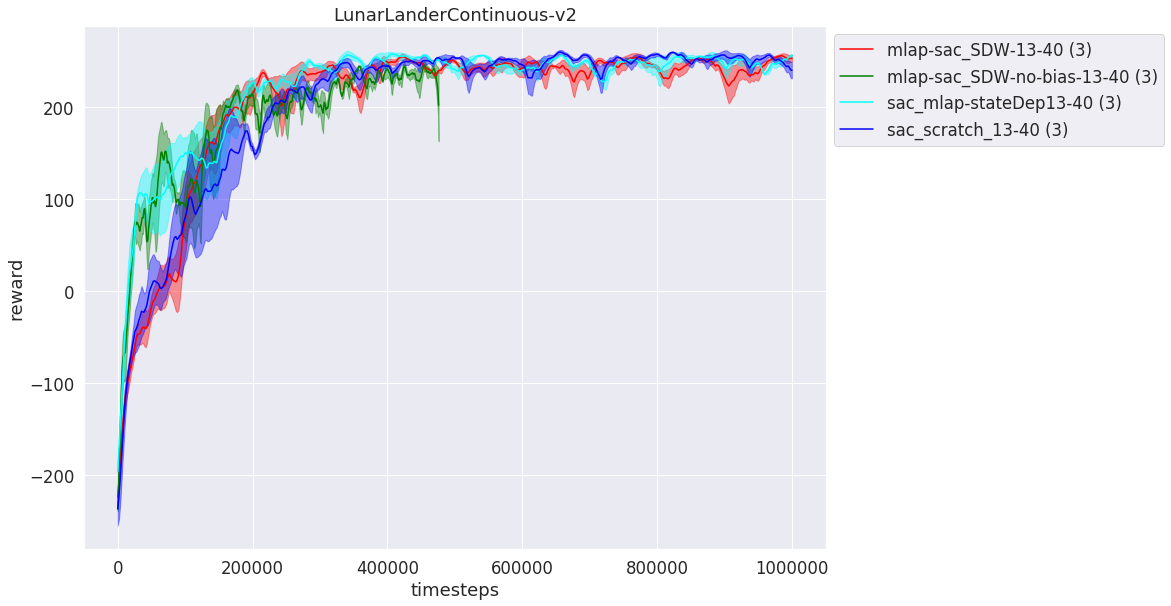

In [156]:
plot.plot_results(results, average_group=True, shaded_std=False, ybase=100, legend_outside=True, xaxis='timesteps', smooth_step=3)

# group plot for LunarLanderContinuous

In [ ]:
for i, main_engine_power in enumerate([10, 13, 18, 23, 28, 33, 38]):
    for j, scale in enumerate([25, 30, 35, 40, 45]):
        name = str(main_engine_power) + '-' + str(scale)
        result_1 = load_group_results('logs/', verbose=False, mask="^logs/mlap-sac/.*"+name+".*")
        result_2 = load_group_results('logs/', verbose=False, mask="^logs/sac_scratch/LunarLanderContinuous-v2_"+name+"_[1-3]$")
        result_3 = load_group_results('logs/', verbose=False, mask="^logs/sac/.*mlap-stateDep"+name+".*")
        result_4 = load_group_results('logs/', verbose=False, mask="^logs/mlap-ppo2/.*"+name+".*")
        results = result_1 + result_2 + result_3 + result_4
        plot.plot_results(results, average_group=True, shaded_std=False, ybase=100, legend_outside=True, xaxis='timesteps', smooth_step=3)
        plt.show()

# Analysis of LunarLanderContinuous paramter search

In [8]:
algo = "sac"
env_id = "LunarLanderContinuous-v2"
save_path = "logs/{}_analysis/{}/".format(env_id, algo)
os.makedirs(save_path, exist_ok=True)
sns.set(style="darkgrid", font_scale=1.5)

In [9]:
agents_dict = defaultdict(lambda: {'env scale':[], 'env main engine power':[], 'average reward':[], 'std reward':[]})
envs_dict = defaultdict(lambda: {'agent scale':[], 'agent main engine power':[], 'average reward':[], 'std reward':[]})
path = "logs/{}".format(algo)

for exp in tqdm(os.listdir(path)):
    exp_parts = exp.split('_')
    if exp_parts[0] == env_id:
        agent_name = exp_parts[1]
        agent_engine = agent_name.split('-')[0]
        agent_scale = agent_name.split('-')[1]
        
        #Remove the below one to load all envs
        if exp_parts[2] != '1':
            continue
        
        test_dir = "{}/{}/results".format(path, exp)
        for env in os.listdir(test_dir):
            env_parts =  env.split('_')
            env_name =  env_parts[0]
            env_engine = env_name.split('-')[0]
            env_scale = env_name.split('-')[1]
            
            results = pd.read_csv('{}/{}/results.csv'.format(test_dir, env), header=0).to_dict()
            
            agents_dict[agent_name]['env scale'].append(env_scale)
            agents_dict[agent_name]['env main engine power'].append(env_engine)
            agents_dict[agent_name]['average reward'].append(results['mean_reward'][0])
            agents_dict[agent_name]['std reward'].append(results['std_reward'][0])
            
            
            envs_dict[env_name]['agent scale'].append(agent_scale)
            envs_dict[env_name]['agent main engine power'].append(agent_engine)
            envs_dict[env_name]['average reward'].append(results['mean_reward'][0])
            envs_dict[env_name]['std reward'].append(results['std_reward'][0])
            

100%|██████████| 105/105 [00:03<00:00, 32.35it/s]


In [10]:
for agent_name, env in agents_dict.items():
    agent_engine = agent_name.split('-')[0]
    agent_scale = agent_name.split('-')[1]
    
    for value in ['average', 'std']:
        df = pd.DataFrame(env)
        center = df[(df['env scale'] == agent_scale) & (df['env main engine power'] == agent_engine)][value+' reward'].values
        df = df.pivot(index='env scale', columns='env main engine power', values=value+' reward')
        f = plt.figure(figsize = (14,5))
        ax = f.subplots()
        sns.heatmap(df, annot=True, robust=True, fmt="g", center=center, linewidths=.5)
        title = 'agent ' + agent_name + ' ' + value + ' reward'
        ax.set_title(title)
        f.savefig(os.path.join(save_path, title+'.png'), bbox_inches='tight', format='png')
        plt.close()
        

In [11]:
for env_name, agent in envs_dict.items():
    env_engine = env_name.split('-')[0]
    env_scale = env_name.split('-')[1]
    
    for value in ['average', 'std']:
        df = pd.DataFrame(agent)
        center = df[(df['agent scale'] == env_scale) & (df['agent main engine power'] == env_engine)][value+' reward'].values
        df = df.pivot(index='agent scale', columns='agent main engine power', values=value+' reward')
        f = plt.figure(figsize = (14,5))
        ax = f.subplots()
        sns.heatmap(df, annot=True, robust=True, fmt="g", center=center, linewidths=.5)
        title = 'env ' + env_name + ' ' + value + ' reward'
        ax.set_title(title)
        f.savefig(os.path.join(save_path, title+'.png'), bbox_inches='tight', format='png')
        plt.close()


# Playground (ignore the codes below)

In [60]:
import gym
env = gym.make('LunarLanderContinuous-v2')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [59]:
env.reset()

NameError: name 'env' is not defined

In [79]:
len(env.action_space.shape)

1

In [86]:
env.observation_space

Box(8,)

In [ ]:
vars(env)

In [ ]:
dir(env)

In [ ]:
import gym.envs.box2d.lunar_lander as l

In [ ]:
env.__class__.env

In [ ]:
globals()['MAIN_ENGINE_POWER']

In [ ]:
env.__setattr__()

In [ ]:
import inspect

In [ ]:
pa = inspect.getfile(env.env.__class__)[:-3]

In [ ]:
lis = pa.split('/')

In [ ]:
lis = lis[lis.index('gym'):]

In [ ]:
lis = ".".join(lis)

In [ ]:
type(l)

In [ ]:
import importlib

In [ ]:
k = importlib.import_module(lis)

In [ ]:
k

In [ ]:
l == k

In [ ]:
vars(l)

In [ ]:
vars(l)['MAIN_ENGINE_POWER'] = 100